<a href="https://colab.research.google.com/github/rafaelgrecco/DS-ML-Projects/blob/master/HeartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEART ATTACK ANALYSIS AND PREDICTION**
Every year, more than 17 million people die due to cardiac diseases, according to the latest data from the World Health Organization (WHO), with heart attacks responsible for a considerable portion of these deaths, therefore with the advancement of Machine Learning techniquesallied to the health area, it is necessary a model that can help doctors to identify susceptible people to be affected by this disease.

This will be the goal throughout this notebook, for that first we will understand the heart attacks.







## *THEORETICAL INTRODUCTION*


---




### *OVERVIEW*
A heart attack happens when the blood flow to the heart is blocked, usually this block is caused by the accumulation of fat, cholesterol and other substances.

In general, a heart attack is fatal, however the treatment has improved considerably over the years.

Symptoms may vary, just as the intensity may vary for different people, and there may be people with more severe symptoms and others with reduced severity. However, the most common symptoms are:

* Chest pain, which can spread to other parts of the body;
* Nausea and abdominal pain;
* Shortness of breathe;
* Cold sweat;
* Fatigue;
* Lightheadedness or sudden dizziness.



### *RISK FACTORS*
There are some factors that can contribute to the unwanted accumulation that promote the process of atheroclerosis (narrowing of arteries), the main risk factors are:

* **Age**, Men aged 45 and over and women aged 55 and over are more likely to have a heart attack;
* **Tobacco**, smoking and long-term exposure to secondhand smoke, increase the chances of a person having a heart attack;
* **High blood pressure**, blood pressure, promotes damage to the arteries, high blood pressure can be prevented by obesity, high cholesterol or diabetes, these factors further increase the risk;
* **High cholesterol levels**, a high level of bad cholesterol, may be more likely to narrow your arteries;
* **Lack of physical activity**, this promotes an increase in high cholesterol levels and also contributes to obesity when aligned with a poor diet, which further increases the risks.

There are countless other factors that can increase the chances of a heart attack, in this notebook I mentioned only the main ones.

## *GETTING TO KNOW THE DATASET*



---


The data that will be used throughout this notebook, can be found in [Kaggle](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

As we will see later, the data set that we are going to work with consists of 14 columns, below I will list them and explain their meaning.

* **age** Age of the patient
* **sex** Sex of the patient
* **cp** Chest pain type: 1 - Typical angina, 2 - Atypical angina, 3 - non-anginal pain, 4 - Asymptomatic
* **trtbps** Resting blood pressure (in *mmHG*)
* **chol** Cholesterol in mg/dl fetched via BMI sensor
* **fbs** Fasting blood sugar > 120 mg/dl (1=True; 0=False)
* **restecg** Resting electrocardiographic results, 0 - Normal, 1 - Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 3 - showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalachh** Maximum heart rate achieved
* **exgn** Exercise induced angina (1=True; 0=False)
* **oldpeak** Previous peak
* **slp** Slope
* **caa** Number of major vassels (0-3)
* **thall** thal rate
* **output** Target variable

 


## *LET'S GO TO THE CODE*



---




### *REQUIRED LIBRARIES*
In this first step we will import all the libraries that will be used throughout the development, initially we will import the most common libraries such as Pandas, Numpy and Matplotlib, then import the modules that will be used from scikit-learn, at the end of this step I added a brief optimization to improve the visualization of the graphics that will be generated

In [1]:
# required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# optimization 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid', color_codes=True)

## *DATA EXPLORATION*

In this step, we will seek some insights and some information about our data, also, we will try to find some correlations between variables.


In [2]:
# path of dataset, read and view data
data = '/content/heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
# dataset dimensions
df.shape

(303, 14)

In the next cells, several graphs will be plotted to help us understand the dataset we are working on, each plot has a title that shows what is being evaluated on that graph.

In this step, interactive graphics were chosen in order to improve the experience of the user who is viewing this data, and also to improve the presentation of a possible dashboard that can be assembled using these graphics.

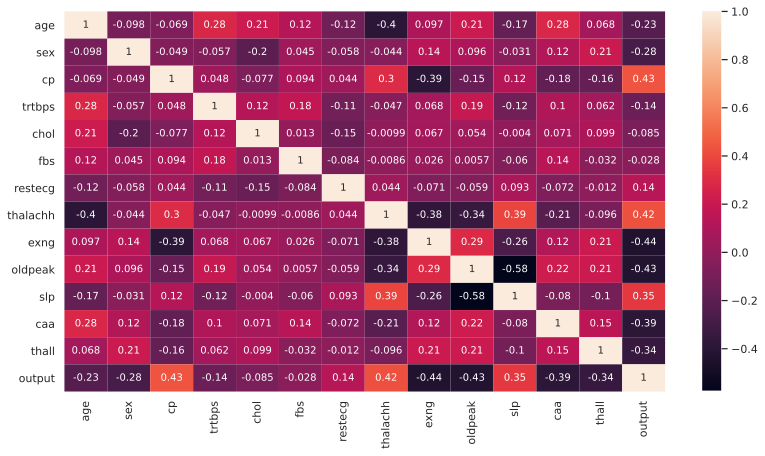

In [6]:
# checking correlation
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
ax = px.histogram(df, x='sex', template='plotly_white', color='output',
                  title = 'Sex distribution')
ax.show()

In [8]:
ax = px.histogram(df, x='age', template='plotly_white', 
                  color='output', title= 'Age Distribution')
ax.show()

In [9]:
ax = px.pie(df, names='output', template='plotly_white', 
            title='Distribution of the dataset, in relation to the output', hole=0.5)
ax.show()

In [10]:
ax = px.pie(df, names='sex', template='plotly_white',
            title='Distribution of the dataset, in relation to the sex', hole=0.5)
ax.show()

In [11]:
ax = px.pie(df, names='cp', template='plotly_white',
            title='Distribution of dataset in relation to the Chest Pain', hole=0.5)
ax.show()

In [12]:
ax = px.scatter_3d(df, x='age', y='trtbps', z='chol', template='plotly',
                   color='output')
ax.show()

## *DATA PROCESSING*

Now that the data has been plotted graphically, let's start pre-processing the data we have, the first thing we are going to do is check if the data is normalized, for that, we will use the `var()` function.

In [13]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trtbps       307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalachh     524.646406
exng           0.220707
oldpeak        1.348095
slp            0.379735
caa            1.045724
thall          0.374883
output         0.248836
dtype: float64

As you can see, it is necessary to normalize some variables, for that we will use `np.log()`, to optimize the code, we will create a lambda function to do this.

In [14]:
f = lambda x: np.log(x)
f(df.age)
f(df.trtbps)
f(df.chol)
f(df.thalachh)

0      5.010635
1      5.231109
2      5.147494
3      5.181784
4      5.093750
         ...   
298    4.812184
299    4.882802
300    4.948760
301    4.744932
302    5.159055
Name: thalachh, Length: 303, dtype: float64

We can see that now the variables that were not normalized are now.

In [15]:
df.var()

age           82.484558
sex            0.217166
cp             1.065132
trtbps       307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalachh     524.646406
exng           0.220707
oldpeak        1.348095
slp            0.379735
caa            1.045724
thall          0.374883
output         0.248836
dtype: float64

In [40]:
# saving the output column in the label variable
label = df['output']

# deleting the dataframe output column
train = df.drop('output', axis=1)

In [78]:
# Separating into training and test data
x_train, x_test, y_train, y_test = train_test_split(train, label, 
                                                    test_size=0.20, random_state=42)

## *MODELS*


---




### *K-NEAREST NEIGHBORS*
This algorithm is the simplest when we refer to Machine Learning, in this algorithm, a point is classified, based on the value of the Euclidean distance from its neighbors, the number of neighbors that it will analyze is the value of K, which we decided, would be it is a very hard job to try various k values to see which one would obtain the best result manually, so we created a loop of repetition which in this case will test the 


In [79]:
scores = []
for i in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  scores.append(accuracy_score(y_test, knn.predict(x_test)))

Next, we are going to plot a graph that shows the accuracy for each K value we tested.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



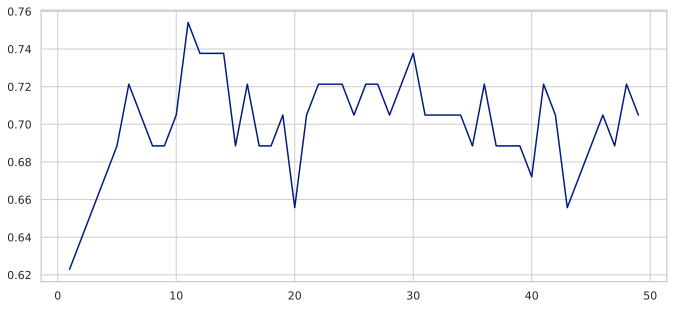

In [80]:
plt.figure(figsize=(10,5))
sns.lineplot(np.arange(1,50), scores)
plt.show();

In [103]:
print('Max Score: {}, for k = {}'.format(max(scores), 1+scores.index(max(scores))))

Max Score: 0.7540983606557377, for k = 11


As you can see, the greatest accuracy was that obtained when the value of k is equal to 11, so this will be the parameter that we will use to train the model.

In [114]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
knnpred = knn.predict(x_test)
accuracy_score(y_test, knnpred)

0.7540983606557377

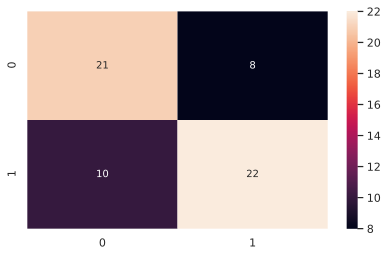

In [86]:
# confusion matrix
cmatrix = confusion_matrix(y_test, knnpred)
sns.heatmap(cmatrix, annot=True)

In [87]:
cr = classification_report(y_test, knnpred)
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        29
           1       0.73      0.69      0.71        32

    accuracy                           0.70        61
   macro avg       0.71      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



### *LOGISTIC REGRESSION*


---



In [88]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lrpred = lr.predict(x_test)
accuracy_score(y_test, lrpred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8852459016393442

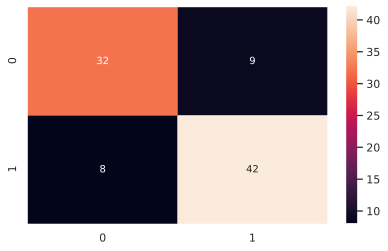

In [24]:
cmatrix = confusion_matrix(y_test, lrpred)
sns.heatmap(cmatrix, annot=True)

In [89]:
cr = classification_report(y_test, lrpred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### *RANDOM FOREST*


---



In [90]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)
accuracy_score(y_test, rfpred)

0.8524590163934426

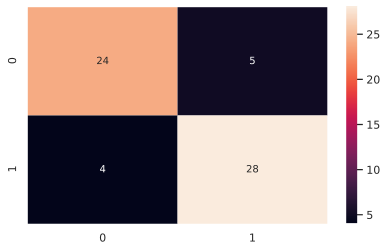

In [105]:
cmatrix = confusion_matrix(y_test, rfpred)
sns.heatmap(cmatrix, annot=True)

In [106]:
cr = classification_report(y_test, rfpred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### *DECISION TREE*


---



In [91]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
treepred = tree.predict(x_test)
accuracy_score(y_test, treepred)

0.7868852459016393

In [92]:
# parameter tuning
dc = DecisionTreeClassifier()
params = {'criterion':['gini', 'entropy'], 'max_depth':[1,3,10,50,100,200]}
grid = GridSearchCV(dc, params, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [93]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 50}

In [107]:
grid.best_score_

0.7684523809523809

### *ADA BOOST CLASSIFIER*


---



In [112]:
adb = AdaBoostClassifier(learning_rate=0.3, n_estimators=100)
adb.fit(x_train, y_train)
adpred = adb.predict(x_test)
accuracy_score(y_test, adpred)

0.8360655737704918

In [113]:
cr = classification_report(y_test, adpred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### *GRADIENT BOOSTING CLASSIFIER*


---



In [108]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbpred = gbc.predict(x_test)
accuracy_score(y_test, gbpred)

0.7704918032786885

In [109]:
cr = classification_report(y_test, gbpred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### *XGB CLASSIFIER* 


---



In [110]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgbpred = xgb.predict(x_test)
accuracy_score(y_test, xgbpred)

0.8524590163934426

In [111]:
cr = classification_report(y_test, xgbpred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## *CONCLUSION*
As we can see the algorithm, Logistic Regression was the one with the highest accuracy, reaching 88%.


